#GNN Explainer - Review-Datensatz

Paper: Ying, Zhitao, et al. "Gnnexplainer: Generating explanations for graph neural networks." Advances in neural information processing systems 32 (2019).

## Packages Installieren

In [ ]:
%%capture
!pip install torch-scatter -f https://data.pyg.org/whl/torch-1.10.0+cu111.html
!pip install torch-sparse -f https://data.pyg.org/whl/torch-1.10.0+cu111.html
!pip install torch-geometric==1.7.2

In [ ]:
%%capture
!pip install dive-into-graphs

In [ ]:
# !git clone https://github.com/divelab/DIG.git
# %cd DIG
# !pip install .

In [ ]:
%%capture
!pip install pm4py

In [ ]:
# Hauptordner-Pfad
import torch
from pathlib import Path
path = Path("/content/drive/MyDrive/Rep_Masterarbeit/XAI_GNN_BPM")
%cd "/content/drive/MyDrive/Rep_Masterarbeit/XAI_GNN_BPM" 

/content/drive/MyDrive/Rep_Masterarbeit/XAI_GNN_BPM


In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
import torch
import joblib

# Module für das Preprocessing der verwendeten Datensätze
from preprocessing.loanApplication import *
from preprocessing.reviewSynthetic import *

from models.gcn3_neu import *

from utilities_pgexplainer_tuning import split_dataset_2_8, visual_tuning_results
from train_gcn import load_gcn_key, load_gcn
from utilities_gnnexplainer_tuning import run_tuning
from dig.xgraph.method import GNNExplainer
from dig.xgraph.evaluation import XCollector, ExplanationProcessor
from utilities_preprocessing import GraphDatasetHelper



In [ ]:
# Verwendete Laufzeit-Umgebung definieren (GPU oder CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

## Datensatz laden 

### Review - Event

In [ ]:
# Laden eines Vorverarbeiteten Datensatzes
dataset_name = "review_all_events_f5_ohe_2_prefix" # "review_sn_f3_ohe_2"  loan_sn_f2_ohe_wEvents_4
dataset = torch.load(path / str("datasets/dataset_" + dataset_name))
feature  = joblib.load("datasets/encoder_" + dataset_name + ".joblib") 



### Review - Aktivität

In [ ]:
# Laden eines Vorverarbeiteten Datensatzes
dataset_name = "review_sn_f3_ohe_2" 
dataset = torch.load(path / str("datasets/dataset_" + dataset_name))
feature  = joblib.load("datasets/encoder_" + dataset_name + ".joblib") 
input_dim = dataset.num_features
# # Model laden
# path_model = path / "models/"
# model_name = "model_" + dataset_name

ds_train, ds_test = split_dataset_2_8(dataset)

##Variablen

Hier sind alle Variablen zusammengefasst. Vor Ausführen der Datei können hier Konfigurationen vorgenommen werden

In [ ]:

# ---------------------------Trainingsdatensatz ------------------------
test_len = 50

# ---------------------------Variablen Model---------------------------
hidden_channel = 100

path_model = path / "models/"
model_name = "model_" + dataset_name

# ---------------------------Variablen XAI Methoden---------------------------
sparsity = 0.7    # Spärlichkeit: Wie viel Prozent des ursprünglichen Graphen aus der Erklärung ausgeschlossen werden soll
num_classes =  dataset.num_classes  # Anzahl der Klassen: 0: Review wurde angenommen, 1: Review wurde abgelehnt



## Visualisierung

In [ ]:
data  = fast_test[1]

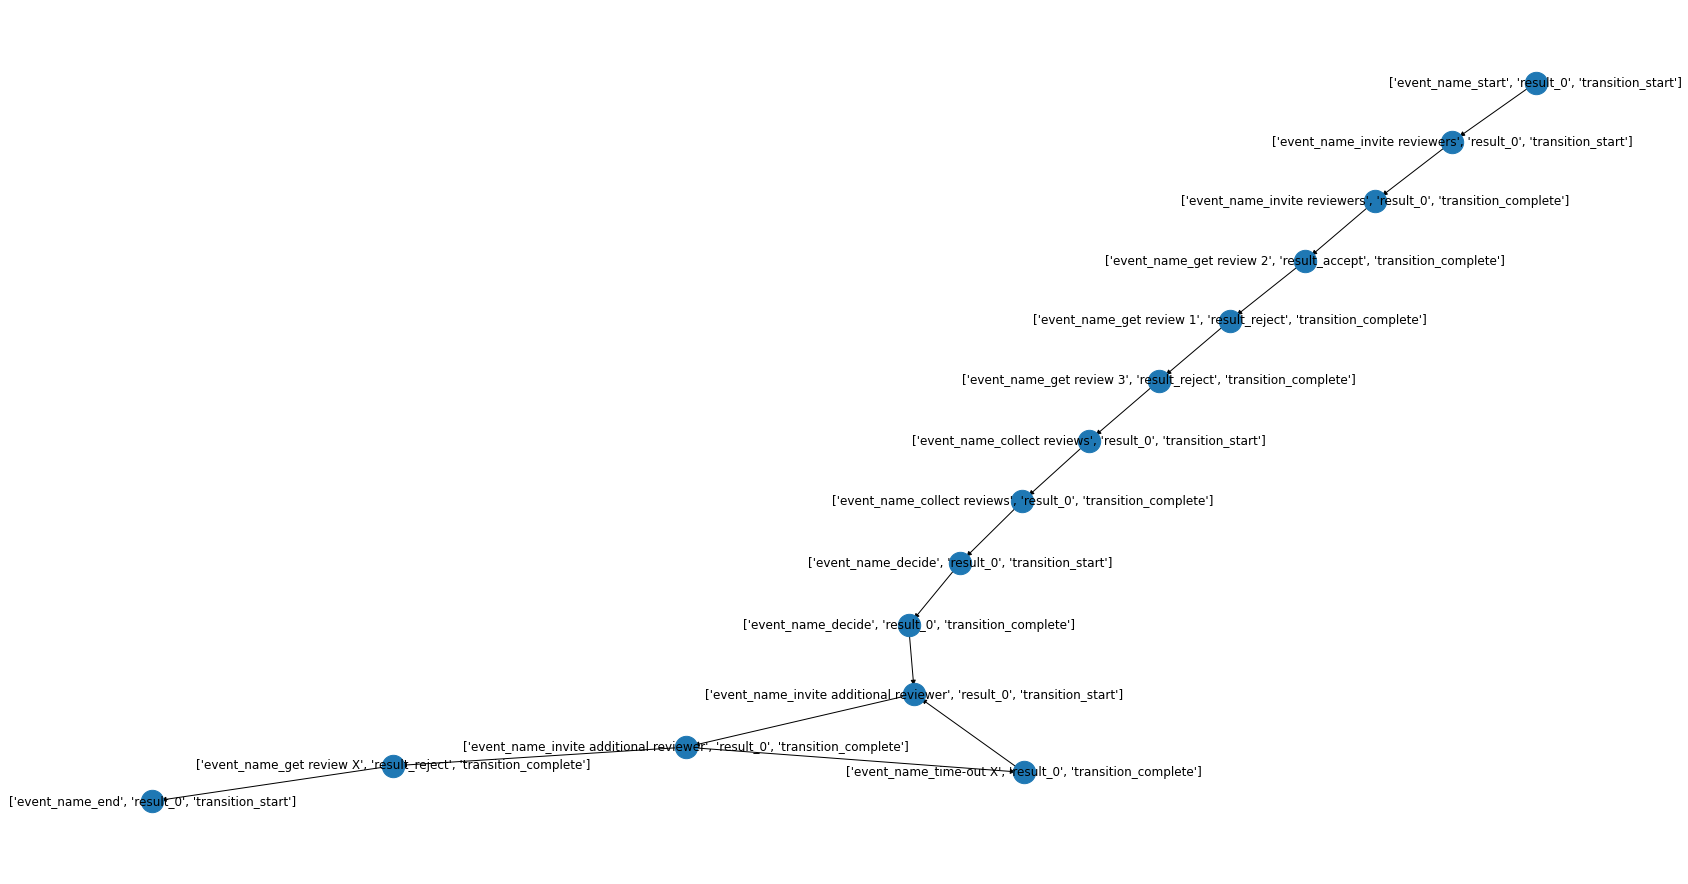

In [ ]:

# Namen können nur bei label encoder angezeigt werden
helper = GraphDatasetHelper(node_feature = feature)
helper.visualise_dataset(data)

## Tuning Review Datensatz

### Aktivtäten-basiert
-> review_sn_f3_ohe_2

In [ ]:
dataset_name

'review_sn_f3_ohe_2'

In [ ]:
param = {
    "lr": 0.05,
    "sparsity_ziel": 0.7,
    "epochs": 100
}
model = load_gcn(input_dim)
result_col = run_tuning(param, model, ds_test[:100], device, path, dataset_name)


-------------Learning Rate: 0.05--------------
GNNExplainer anwenden


100%|██████████| 100/100 [02:07<00:00,  1.28s/it]

Saved: /content/drive/MyDrive/Rep_Masterarbeit/XAI_GNN_BPM/xai_methods/gnnexplainer/tuning/review_sn_f3_ohe_2/1649974047_0.05 _review_sn_f3_ohe_2
Fidelity+: 0.20608574151992798, Fidelity-: 0.32124561071395874, Sparsity: 0.7067587375640869
save Hyperparameter


In [ ]:
param = {
    "lr": 0.05,
    "sparsity_ziel": 0.7,
    "epochs": 200
}
model = load_gcn(input_dim)
result_col = run_tuning(param, model, ds_test[:100], device, path, dataset_name)


-------------Learning Rate: 0.05--------------
GNNExplainer anwenden


100%|██████████| 100/100 [04:11<00:00,  2.51s/it]

Saved: /content/drive/MyDrive/Rep_Masterarbeit/XAI_GNN_BPM/xai_methods/gnnexplainer/tuning/review_sn_f3_ohe_2/1649974209_0.05 _review_sn_f3_ohe_2
Fidelity+: 0.19561542570590973, Fidelity-: 0.36466309428215027, Sparsity: 0.7067587375640869
save Hyperparameter


In [ ]:
param = {
    "lr": 0.05,
    "sparsity_ziel": 0.7,
    "epochs": 300
}
model = load_gcn(input_dim)
result_col = run_tuning(param, model, ds_test[:100], device, path, dataset_name)


-------------Learning Rate: 0.05--------------
GNNExplainer anwenden


100%|██████████| 100/100 [06:15<00:00,  3.75s/it]

Saved: /content/drive/MyDrive/Rep_Masterarbeit/XAI_GNN_BPM/xai_methods/gnnexplainer/tuning/review_sn_f3_ohe_2/1649974460_0.05 _review_sn_f3_ohe_2
Fidelity+: 0.1800975352525711, Fidelity-: 0.40576979517936707, Sparsity: 0.7067587375640869
save Hyperparameter


In [ ]:
param = {
    "lr": 0.05,
    "sparsity_ziel": 0.7,
    "epochs": 400
}
model = load_gcn(input_dim)
result_col = run_tuning(param, model, ds_test[:100], device, path, dataset_name)


-------------Learning Rate: 0.05--------------
GNNExplainer anwenden


100%|██████████| 100/100 [08:20<00:00,  5.00s/it]

Saved: /content/drive/MyDrive/Rep_Masterarbeit/XAI_GNN_BPM/xai_methods/gnnexplainer/tuning/review_sn_f3_ohe_2/1649974836_0.05 _review_sn_f3_ohe_2
Fidelity+: 0.19654694199562073, Fidelity-: 0.38458767533302307, Sparsity: 0.7067587375640869
save Hyperparameter


In [ ]:
param = {
    "lr": 0.05,
    "sparsity_ziel": 0.7,
    "epochs": 500
}
model = load_gcn(input_dim)
result_col = run_tuning(param, model, ds_test[:100], device, path, dataset_name)


-------------Learning Rate: 0.05--------------
GNNExplainer anwenden


100%|██████████| 100/100 [10:22<00:00,  6.22s/it]

Saved: /content/drive/MyDrive/Rep_Masterarbeit/XAI_GNN_BPM/xai_methods/gnnexplainer/tuning/review_sn_f3_ohe_2/1649975336_0.05 _review_sn_f3_ohe_2
Fidelity+: 0.24511289596557617, Fidelity-: 0.3262428045272827, Sparsity: 0.7067587375640869
save Hyperparameter


In [ ]:
param = {
    "lr": 0.01,
    "sparsity_ziel": 0.7,
    "epochs": 300
}
model = load_gcn(input_dim)
result_col = run_tuning(param, model, ds_test[:100], device, path, dataset_name)


-------------Learning Rate: 0.01--------------
GNNExplainer anwenden


100%|██████████| 100/100 [06:16<00:00,  3.76s/it]

Saved: /content/drive/MyDrive/Rep_Masterarbeit/XAI_GNN_BPM/xai_methods/gnnexplainer/tuning/review_sn_f3_ohe_2/1649975959_0.01 _review_sn_f3_ohe_2
Fidelity+: 0.27676817774772644, Fidelity-: 0.27667132019996643, Sparsity: 0.7067587375640869
save Hyperparameter


In [ ]:
param = {
    "lr": 0.01,
    "sparsity_ziel": 0.7,
    "epochs": 400
}
model = load_gcn(input_dim)
result_col = run_tuning(param, model, ds_test[:100], device, path, dataset_name)


-------------Learning Rate: 0.01--------------
GNNExplainer anwenden


100%|██████████| 100/100 [08:18<00:00,  4.98s/it]

Saved: /content/drive/MyDrive/Rep_Masterarbeit/XAI_GNN_BPM/xai_methods/gnnexplainer/tuning/review_sn_f3_ohe_2/1649976335_0.01 _review_sn_f3_ohe_2
Fidelity+: 0.24302776157855988, Fidelity-: 0.26855191588401794, Sparsity: 0.7067587375640869
save Hyperparameter


In [ ]:
param = {
    "lr": 0.01,
    "sparsity_ziel": 0.7,
    "epochs": 500
}
model = load_gcn(input_dim)
result_col = run_tuning(param, model, ds_test[:100], device, path, dataset_name)


-------------Learning Rate: 0.01--------------
GNNExplainer anwenden


100%|██████████| 100/100 [10:21<00:00,  6.21s/it]

Saved: /content/drive/MyDrive/Rep_Masterarbeit/XAI_GNN_BPM/xai_methods/gnnexplainer/tuning/review_sn_f3_ohe_2/1649976834_0.01 _review_sn_f3_ohe_2
Fidelity+: 0.24340738356113434, Fidelity-: 0.3585120439529419, Sparsity: 0.7067587375640869
save Hyperparameter


In [ ]:
param = {
    "lr": 0.001,
    "sparsity_ziel": 0.7,
    "epochs": 400
}
model = load_gcn(input_dim)
result_col = run_tuning(param, model, ds_test[:100], device, path, dataset_name)


-------------Learning Rate: 0.001--------------
GNNExplainer anwenden


100%|██████████| 100/100 [08:16<00:00,  4.96s/it]

Saved: /content/drive/MyDrive/Rep_Masterarbeit/XAI_GNN_BPM/xai_methods/gnnexplainer/tuning/review_sn_f3_ohe_2/1649977455_0.001 _review_sn_f3_ohe_2
Fidelity+: 0.31958651542663574, Fidelity-: 0.2448102980852127, Sparsity: 0.7067587375640869
save Hyperparameter


In [ ]:
param = {
    "lr": 0.005,
    "sparsity_ziel": 0.7,
    "epochs": 400
}
model = load_gcn(input_dim)
result_col = run_tuning(param, model, ds_test[:100], device, path, dataset_name)


-------------Learning Rate: 0.005--------------
GNNExplainer anwenden


100%|██████████| 100/100 [08:15<00:00,  4.96s/it]

Saved: /content/drive/MyDrive/Rep_Masterarbeit/XAI_GNN_BPM/xai_methods/gnnexplainer/tuning/review_sn_f3_ohe_2/1649977951_0.005 _review_sn_f3_ohe_2
Fidelity+: 0.3026846945285797, Fidelity-: 0.2600095868110657, Sparsity: 0.7067587375640869
save Hyperparameter


### Event basiert
-> review_all_events_f5_ohe_2_prefix

In [ ]:
dataset_name

'review_all_events_f5_ohe_2_prefix'

In [ ]:
# Dataset und Model
key = 0
dataset0 = dataset[key]
input_dim = dataset0[0].x.shape[1]

# split
ds_train, ds_test = split_dataset_2_8(dataset0)

In [ ]:
param = {
    "lr": 0.001,
    "sparsity_ziel": 0.7,
    "epochs": 400
}
model = load_gcn_key(dataset_name, key, input_dim, device, path)
result_col = run_tuning(param, model, ds_test[:100], device, path, f"{dataset_name}_{key}")

-------------Learning Rate: 0.001--------------
GNNExplainer anwenden


100%|██████████| 100/100 [05:54<00:00,  3.55s/it]

Saved: /content/drive/MyDrive/Rep_Masterarbeit/XAI_GNN_BPM/xai_methods/gnnexplainer/tuning/review_all_events_f5_ohe_2_prefix_0/1650044723_0.001 _review_all_events_f5_ohe_2_prefix_0
Fidelity+: 0.13362297415733337, Fidelity-: 0.39119982719421387, Sparsity: 0.7152990698814392
save Hyperparameter


In [ ]:
param = {
    "lr": 0.001,
    "sparsity_ziel": 0.7,
    "epochs": 300
}
model = load_gcn_key(dataset_name, key, input_dim, device, path)
result_col = run_tuning(param, model, ds_test[:100], device, path, f"{dataset_name}_{key}")

-------------Learning Rate: 0.001--------------
GNNExplainer anwenden


100%|██████████| 100/100 [04:27<00:00,  2.67s/it]

Saved: /content/drive/MyDrive/Rep_Masterarbeit/XAI_GNN_BPM/xai_methods/gnnexplainer/tuning/review_all_events_f5_ohe_2_prefix_0/1650045078_0.001 _review_all_events_f5_ohe_2_prefix_0
Fidelity+: 0.17522840201854706, Fidelity-: 0.357692688703537, Sparsity: 0.7152990698814392
save Hyperparameter


In [ ]:
param = {
    "lr": 0.001,
    "sparsity_ziel": 0.7,
    "epochs": 500
}
model = load_gcn_key(dataset_name, key, input_dim, device, path)
result_col = run_tuning(param, model, ds_test[:100], device, path, f"{dataset_name}_{key}")

-------------Learning Rate: 0.001--------------
GNNExplainer anwenden


100%|██████████| 100/100 [07:46<00:00,  4.67s/it]

Saved: /content/drive/MyDrive/Rep_Masterarbeit/XAI_GNN_BPM/xai_methods/gnnexplainer/tuning/review_all_events_f5_ohe_2_prefix_0/1650045345_0.001 _review_all_events_f5_ohe_2_prefix_0
Fidelity+: 0.20100203156471252, Fidelity-: 0.3921840190887451, Sparsity: 0.7152990698814392
save Hyperparameter


In [ ]:
param = {
    "lr": 0.001,
    "sparsity_ziel": 0.7,
    "epochs": 600
}
model = load_gcn_key(dataset_name, key, input_dim, device, path)
result_col = run_tuning(param, model, ds_test[:100], device, path, f"{dataset_name}_{key}")

-------------Learning Rate: 0.001--------------
GNNExplainer anwenden


100%|██████████| 100/100 [09:37<00:00,  5.78s/it]

Saved: /content/drive/MyDrive/Rep_Masterarbeit/XAI_GNN_BPM/xai_methods/gnnexplainer/tuning/review_all_events_f5_ohe_2_prefix_0/1650048124_0.001 _review_all_events_f5_ohe_2_prefix_0
Fidelity+: 0.1688179075717926, Fidelity-: 0.38827595114707947, Sparsity: 0.7152990698814392
save Hyperparameter


In [ ]:
param = {
    "lr": 0.005,
    "sparsity_ziel": 0.7,
    "epochs": 400
}
model = load_gcn_key(dataset_name, key, input_dim, device, path)
result_col = run_tuning(param, model, ds_test[:100], device, path, f"{dataset_name}_{key}")

-------------Learning Rate: 0.005--------------
GNNExplainer anwenden


100%|██████████| 100/100 [06:15<00:00,  3.75s/it]

Saved: /content/drive/MyDrive/Rep_Masterarbeit/XAI_GNN_BPM/xai_methods/gnnexplainer/tuning/review_all_events_f5_ohe_2_prefix_0/1650045812_0.005 _review_all_events_f5_ohe_2_prefix_0
Fidelity+: 0.18448027968406677, Fidelity-: 0.38355639576911926, Sparsity: 0.7152990698814392
save Hyperparameter


In [ ]:
param = {
    "lr": 0.05,
    "sparsity_ziel": 0.7,
    "epochs": 400
}
model = load_gcn_key(dataset_name, key, input_dim, device, path)
result_col = run_tuning(param, model, ds_test[:100], device, path, f"{dataset_name}_{key}")

-------------Learning Rate: 0.05--------------
GNNExplainer anwenden


100%|██████████| 100/100 [05:58<00:00,  3.58s/it]

Saved: /content/drive/MyDrive/Rep_Masterarbeit/XAI_GNN_BPM/xai_methods/gnnexplainer/tuning/review_all_events_f5_ohe_2_prefix_0/1650046187_0.05 _review_all_events_f5_ohe_2_prefix_0
Fidelity+: 0.16856834292411804, Fidelity-: 0.38071852922439575, Sparsity: 0.7152990698814392
save Hyperparameter


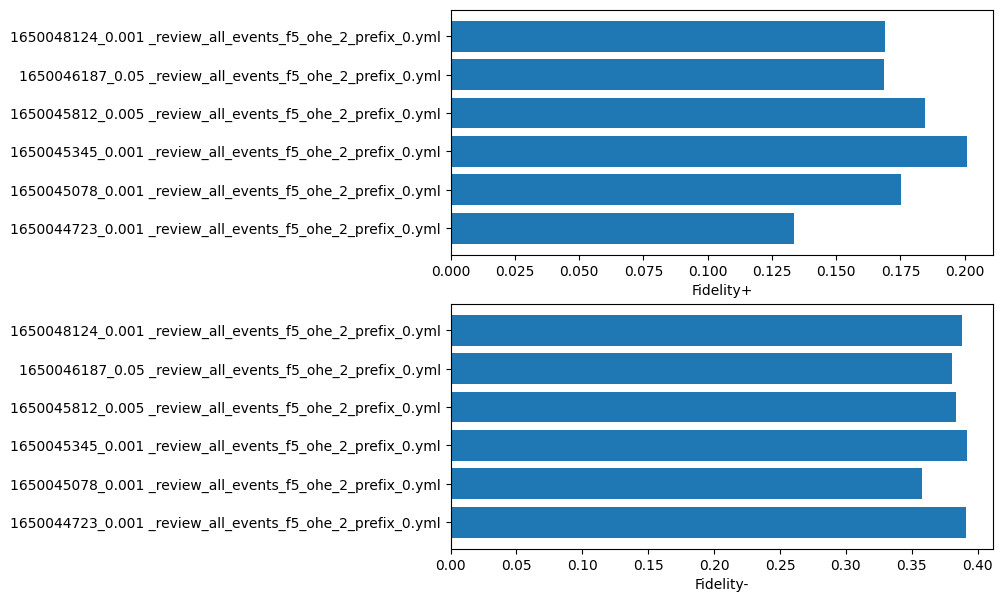

In [ ]:
visual_tuning_results(f"{dataset_name}_{key}", path, True)

###Präfixe
-> review_all_events_f5_ohe_2_prefix

#### Länge 4

In [ ]:
dataset_name

'review_all_events_f5_ohe_2_prefix'

In [ ]:
# Dataset und Model
key = 4
dataset4 = dataset[key]
input_dim = dataset4[0].x.shape[1]

# split
ds_train, ds_test = split_dataset_2_8(dataset4)

In [ ]:
param = {
    "lr": 0.001,
    "sparsity_ziel": 0.6,
    "epochs": 400
}
model = load_gcn_key(dataset_name, key, input_dim, device, path)
result_col = run_tuning(param, model, ds_test[:100], device, path, f"{dataset_name}_{key}")

-------------Learning Rate: 0.001--------------
GNNExplainer anwenden


100%|██████████| 100/100 [06:06<00:00,  3.66s/it]


Saved: /content/drive/MyDrive/Rep_Masterarbeit/XAI_GNN_BPM/xai_methods/gnnexplainer/tuning/review_all_events_f5_ohe_2_prefix_4/1650071037_0.001 _review_all_events_f5_ohe_2_prefix_4
Fidelity+: 0.03501636162400246, Fidelity-: 0.036039579659700394, Sparsity: 0.714285671710968
save Hyperparameter


In [ ]:
param = {
    "lr": 0.001,
    "sparsity_ziel": 0.6,
    "epochs": 300
}
model = load_gcn_key(dataset_name, key, input_dim, device, path)
result_col = run_tuning(param, model, ds_test[:100], device, path, f"{dataset_name}_{key}")

-------------Learning Rate: 0.001--------------
GNNExplainer anwenden


100%|██████████| 100/100 [04:11<00:00,  2.52s/it]

Saved: /content/drive/MyDrive/Rep_Masterarbeit/XAI_GNN_BPM/xai_methods/gnnexplainer/tuning/review_all_events_f5_ohe_2_prefix_4/1650071404_0.001 _review_all_events_f5_ohe_2_prefix_4
Fidelity+: 0.06367107480764389, Fidelity-: 0.02329678274691105, Sparsity: 0.714285671710968
save Hyperparameter


In [ ]:
param = {
    "lr": 0.001,
    "sparsity_ziel": 0.6,
    "epochs": 500
}
model = load_gcn_key(dataset_name, key, input_dim, device, path)
result_col = run_tuning(param, model, ds_test[:100], device, path, f"{dataset_name}_{key}")

-------------Learning Rate: 0.001--------------
GNNExplainer anwenden


100%|██████████| 100/100 [06:54<00:00,  4.15s/it]

Saved: /content/drive/MyDrive/Rep_Masterarbeit/XAI_GNN_BPM/xai_methods/gnnexplainer/tuning/review_all_events_f5_ohe_2_prefix_4/1650071656_0.001 _review_all_events_f5_ohe_2_prefix_4
Fidelity+: 0.061779674142599106, Fidelity-: 0.0006135785370133817, Sparsity: 0.714285671710968
save Hyperparameter


In [ ]:
param = {
    "lr": 0.005,
    "sparsity_ziel": 0.6,
    "epochs": 400
}
model = load_gcn_key(dataset_name, key, input_dim, device, path)
result_col = run_tuning(param, model, ds_test[:100], device, path, f"{dataset_name}_{key}")

In [ ]:
param = {
    "lr": 0.005,
    "sparsity_ziel": 0.6,
    "epochs": 500
}
model = load_gcn_key(dataset_name, key, input_dim, device, path)
result_col = run_tuning(param, model, ds_test[:100], device, path, f"{dataset_name}_{key}")

-------------Learning Rate: 0.005--------------
GNNExplainer anwenden


100%|██████████| 100/100 [06:53<00:00,  4.14s/it]

Saved: /content/drive/MyDrive/Rep_Masterarbeit/XAI_GNN_BPM/xai_methods/gnnexplainer/tuning/review_all_events_f5_ohe_2_prefix_4/1650072403_0.005 _review_all_events_f5_ohe_2_prefix_4
Fidelity+: 0.024073181673884392, Fidelity-: 0.05186028406023979, Sparsity: 0.714285671710968
save Hyperparameter


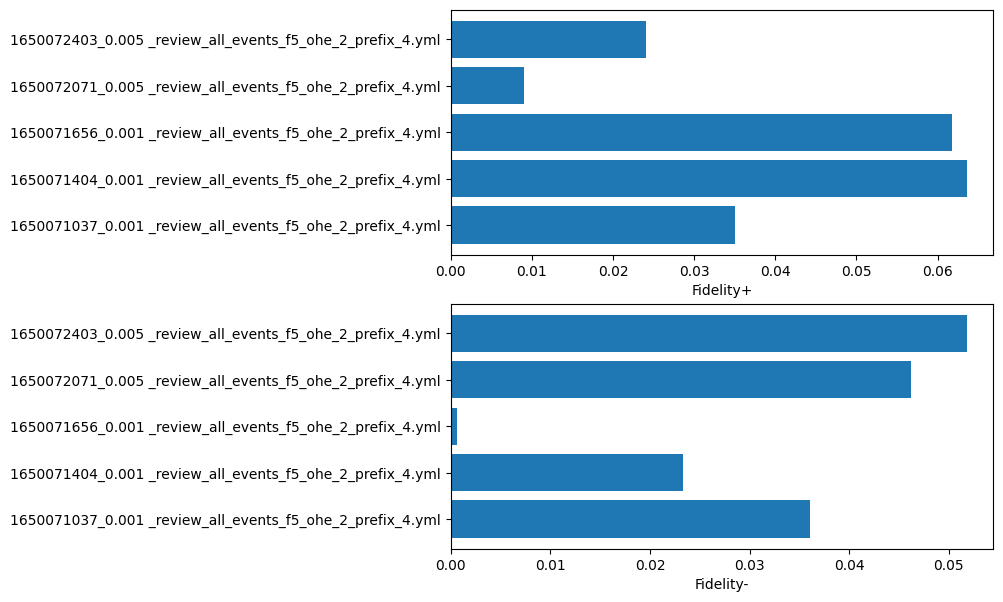

In [ ]:
visual_tuning_results(f"{dataset_name}_{key}", path, True)

####Länge 7

In [ ]:
dataset_name

In [ ]:
# Dataset und Model
key = 7
dataset7 = dataset[key]
input_dim = dataset7[0].x.shape[1]

# split
ds_train, ds_test = split_dataset_2_8(dataset7)

In [ ]:
param = {
    "lr": 0.001,
    "sparsity_ziel": 0.6,
    "epochs": 400
}
model = load_gcn_key(dataset_name, key, input_dim, device, path)
result_col = run_tuning(param, model, ds_test[:100], device, path, f"{dataset_name}_{key}")

-------------Learning Rate: 0.001--------------
GNNExplainer anwenden


100%|██████████| 100/100 [05:32<00:00,  3.32s/it]


Saved: /content/drive/MyDrive/Rep_Masterarbeit/XAI_GNN_BPM/xai_methods/gnnexplainer/tuning/review_all_events_f5_ohe_2_prefix_7/1650072818_0.001 _review_all_events_f5_ohe_2_prefix_7
Fidelity+: 0.07531049847602844, Fidelity-: 0.07101287692785263, Sparsity: 0.6153845191001892
save Hyperparameter


In [ ]:
param = {
    "lr": 0.001,
    "sparsity_ziel": 0.6,
    "epochs": 300
}
model = load_gcn_key(dataset_name, key, input_dim, device, path)
result_col = run_tuning(param, model, ds_test[:100], device, path, f"{dataset_name}_{key}")

In [ ]:
param = {
    "lr": 0.001,
    "sparsity_ziel": 0.6,
    "epochs": 500
}
model = load_gcn_key(dataset_name, key, input_dim, device, path)
result_col = run_tuning(param, model, ds_test[:100], device, path, f"{dataset_name}_{key}")

In [ ]:
param = {
    "lr": 0.005,
    "sparsity_ziel": 0.6,
    "epochs": 400
}
model = load_gcn_key(dataset_name, key, input_dim, device, path)
result_col = run_tuning(param, model, ds_test[:100], device, path, f"{dataset_name}_{key}")

In [ ]:
param = {
    "lr": 0.005,
    "sparsity_ziel": 0.6,
    "epochs": 500
}
model = load_gcn_key(dataset_name, key, input_dim, device, path)
result_col = run_tuning(param, model, ds_test[:100], device, path, f"{dataset_name}_{key}")

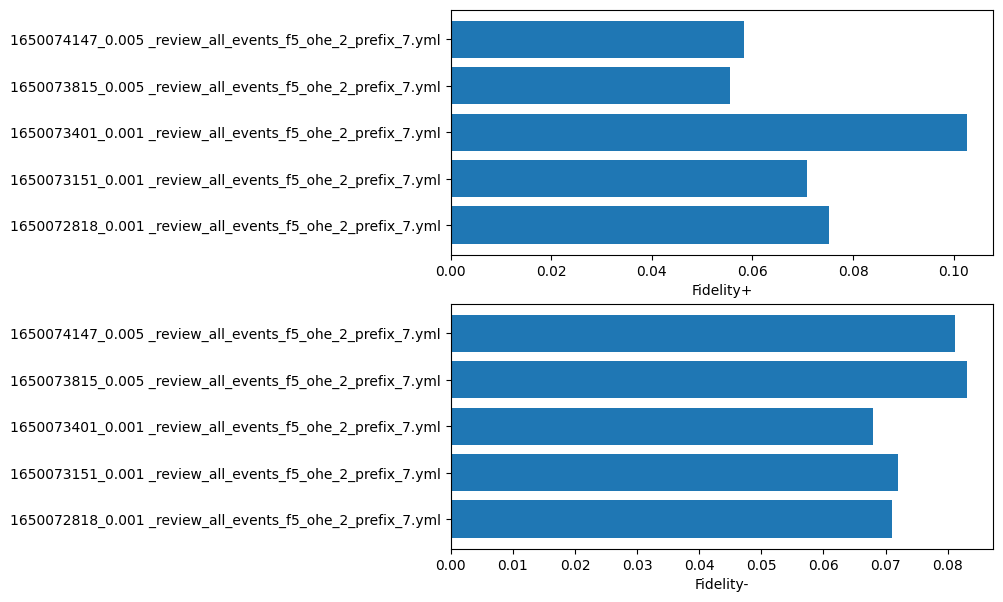

In [ ]:
visual_tuning_results(f"{dataset_name}_{key}", path, True)

####Länge 10

In [ ]:
dataset_name

'review_all_events_f5_ohe_2_prefix'

In [ ]:
# Dataset und Model
key = 10
datase10  = dataset[key]
input_dim = datase10[0].x.shape[1]

# split
ds_train, ds_test = split_dataset_2_8(datase10)

In [ ]:
param = {
    "lr": 0.001,
    "sparsity_ziel": 0.6,
    "epochs": 400
}
model = load_gcn_key(dataset_name, key, input_dim, device, path)
result_col = run_tuning(param, model, ds_test[:100], device, path, f"{dataset_name}_{key}")

In [ ]:
param = {
    "lr": 0.001,
    "sparsity_ziel": 0.6,
    "epochs": 300
}
model = load_gcn_key(dataset_name, key, input_dim, device, path)
result_col = run_tuning(param, model, ds_test[:100], device, path, f"{dataset_name}_{key}")

In [ ]:
param = {
    "lr": 0.001,
    "sparsity_ziel": 0.6,
    "epochs": 500
}
model = load_gcn_key(dataset_name, key, input_dim, device, path)
result_col = run_tuning(param, model, ds_test[:100], device, path, f"{dataset_name}_{key}")

-------------Learning Rate: 0.001--------------
GNNExplainer anwenden


100%|██████████| 100/100 [06:54<00:00,  4.14s/it]

Saved: /content/drive/MyDrive/Rep_Masterarbeit/XAI_GNN_BPM/xai_methods/gnnexplainer/tuning/review_all_events_f5_ohe_2_prefix_10/1650075145_0.001 _review_all_events_f5_ohe_2_prefix_10
Fidelity+: 0.07982493191957474, Fidelity-: 0.04889381304383278, Sparsity: 0.6315789818763733
save Hyperparameter


In [ ]:
param = {
    "lr": 0.005,
    "sparsity_ziel": 0.6,
    "epochs": 400
}
model = load_gcn_key(dataset_name, key, input_dim, device, path)
result_col = run_tuning(param, model, ds_test[:100], device, path, f"{dataset_name}_{key}")

In [ ]:
param = {
    "lr": 0.005,
    "sparsity_ziel": 0.6,
    "epochs": 500
}
model = load_gcn_key(dataset_name, key, input_dim, device, path)
result_col = run_tuning(param, model, ds_test[:100], device, path, f"{dataset_name}_{key}")

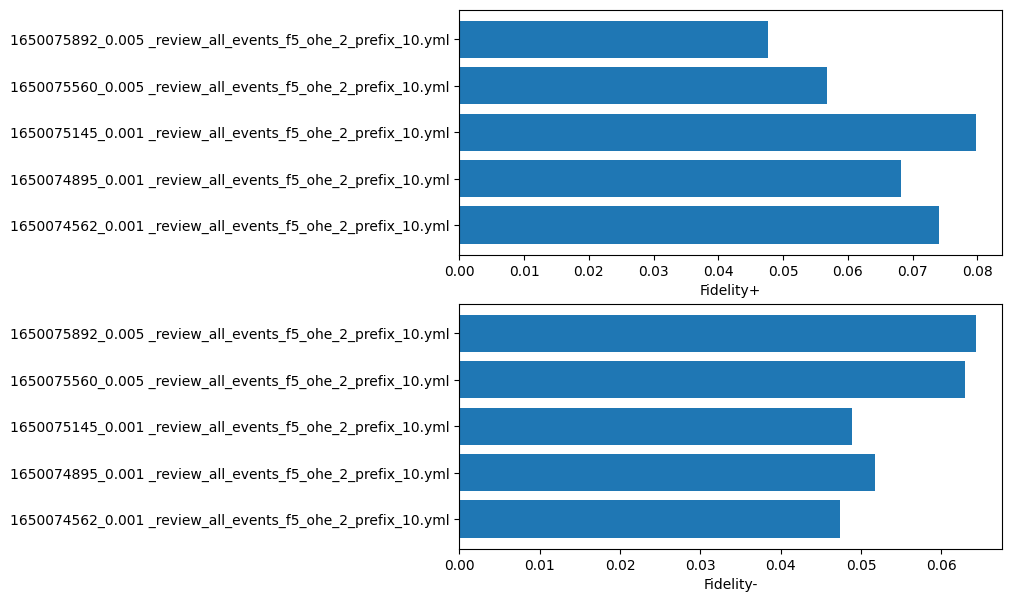

In [ ]:
visual_tuning_results(f"{dataset_name}_{key}", path, True)

####Länge 13

In [ ]:
dataset_name

'review_all_events_f5_ohe_2_prefix'

In [ ]:
# Dataset und Model
key = 13
dataset13 = dataset[key]
input_dim = dataset13[0].x.shape[1]

# split
ds_train, ds_test = split_dataset_2_8(dataset13)

In [ ]:
param = {
    "lr": 0.001,
    "sparsity_ziel": 0.6,
    "epochs": 400
}
model = load_gcn_key(dataset_name, key, input_dim, device, path)
result_col = run_tuning(param, model, ds_test[:100], device, path, f"{dataset_name}_{key}")

-------------Learning Rate: 0.001--------------
GNNExplainer anwenden


100%|██████████| 100/100 [05:32<00:00,  3.32s/it]


Saved: /content/drive/MyDrive/Rep_Masterarbeit/XAI_GNN_BPM/xai_methods/gnnexplainer/tuning/review_all_events_f5_ohe_2_prefix_13/1650076307_0.001 _review_all_events_f5_ohe_2_prefix_13
Fidelity+: 0.06248354911804199, Fidelity-: 0.027216129004955292, Sparsity: 0.6000000238418579
save Hyperparameter


In [ ]:
param = {
    "lr": 0.001,
    "sparsity_ziel": 0.6,
    "epochs": 300
}
model = load_gcn_key(dataset_name, key, input_dim, device, path)
result_col = run_tuning(param, model, ds_test[:100], device, path, f"{dataset_name}_{key}")

-------------Learning Rate: 0.001--------------
GNNExplainer anwenden


100%|██████████| 100/100 [04:10<00:00,  2.50s/it]

Saved: /content/drive/MyDrive/Rep_Masterarbeit/XAI_GNN_BPM/xai_methods/gnnexplainer/tuning/review_all_events_f5_ohe_2_prefix_13/1650076639_0.001 _review_all_events_f5_ohe_2_prefix_13
Fidelity+: 0.06632552295923233, Fidelity-: 0.03290865570306778, Sparsity: 0.6000000238418579
save Hyperparameter


In [ ]:
param = {
    "lr": 0.001,
     "sparsity_ziel": 0.6,
    "epochs": 500
}
model = load_gcn_key(dataset_name, key, input_dim, device, path)
result_col = run_tuning(param, model, ds_test[:100], device, path, f"{dataset_name}_{key}")

In [ ]:
param = {
    "lr": 0.005,
    "sparsity_ziel": 0.6,
    "epochs": 400
}
model = load_gcn_key(dataset_name, key, input_dim, device, path)
result_col = run_tuning(param, model, ds_test[:100], device, path, f"{dataset_name}_{key}")

-------------Learning Rate: 0.005--------------
GNNExplainer anwenden


100%|██████████| 100/100 [05:32<00:00,  3.32s/it]

Saved: /content/drive/MyDrive/Rep_Masterarbeit/XAI_GNN_BPM/xai_methods/gnnexplainer/tuning/review_all_events_f5_ohe_2_prefix_13/1650077304_0.005 _review_all_events_f5_ohe_2_prefix_13
Fidelity+: 0.06418547034263611, Fidelity-: 0.029865313321352005, Sparsity: 0.6000000238418579
save Hyperparameter


In [ ]:
param = {
    "lr": 0.005,
    "sparsity_ziel": 0.6,
    "epochs": 500
}
model = load_gcn_key(dataset_name, key, input_dim, device, path)
result_col = run_tuning(param, model, ds_test[:100], device, path, f"{dataset_name}_{key}")

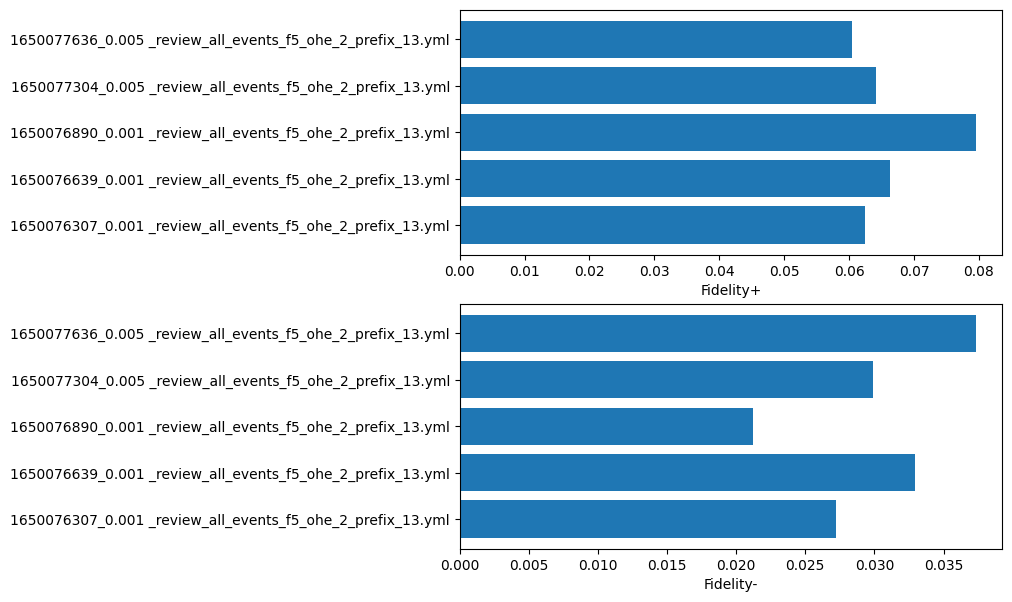

In [ ]:
visual_tuning_results(f"{dataset_name}_{key}", path, True)

####Länge 16

In [ ]:
dataset_name

'review_all_events_f5_ohe_2_prefix'

In [ ]:
# Dataset und Model
key = 16
dataset16 = dataset[key]
input_dim = dataset16[0].x.shape[1]

# split
ds_train, ds_test = split_dataset_2_8(dataset16)

In [ ]:
param = {
    "lr": 0.001,
    "sparsity_ziel": 0.6,
    "epochs": 400
}
model = load_gcn_key(dataset_name, key, input_dim, device, path)
result_col = run_tuning(param, model, ds_test[:100], device, path, f"{dataset_name}_{key}")

-------------Learning Rate: 0.001--------------
GNNExplainer anwenden


100%|██████████| 100/100 [05:32<00:00,  3.33s/it]


Saved: /content/drive/MyDrive/Rep_Masterarbeit/XAI_GNN_BPM/xai_methods/gnnexplainer/tuning/review_all_events_f5_ohe_2_prefix_16/1650078051_0.001 _review_all_events_f5_ohe_2_prefix_16
Fidelity+: 0.10141170769929886, Fidelity-: 0.021572742611169815, Sparsity: 0.6129032373428345
save Hyperparameter


In [ ]:
param = {
    "lr": 0.001,
    "sparsity_ziel": 0.6,
    "epochs": 300
}
model = load_gcn_key(dataset_name, key, input_dim, device, path)
result_col = run_tuning(param, model, ds_test[:100], device, path, f"{dataset_name}_{key}")

In [ ]:
param = {
    "lr": 0.001,
    "sparsity_ziel": 0.6,
    "epochs": 500
}
model = load_gcn_key(dataset_name, key, input_dim, device, path)
result_col = run_tuning(param, model, ds_test[:100], device, path, f"{dataset_name}_{key}")

In [ ]:
param = {
    "lr": 0.005,
    "sparsity_ziel": 0.6,
    "epochs": 400
}
model = load_gcn_key(dataset_name, key, input_dim, device, path)
result_col = run_tuning(param, model, ds_test[:100], device, path, f"{dataset_name}_{key}")

In [ ]:
param = {
    "lr": 0.005,
    "sparsity_ziel": 0.6,
    "epochs": 500
}
model = load_gcn_key(dataset_name, key, input_dim, device, path)
result_col = run_tuning(param, model, ds_test[:100], device, path, f"{dataset_name}_{key}")

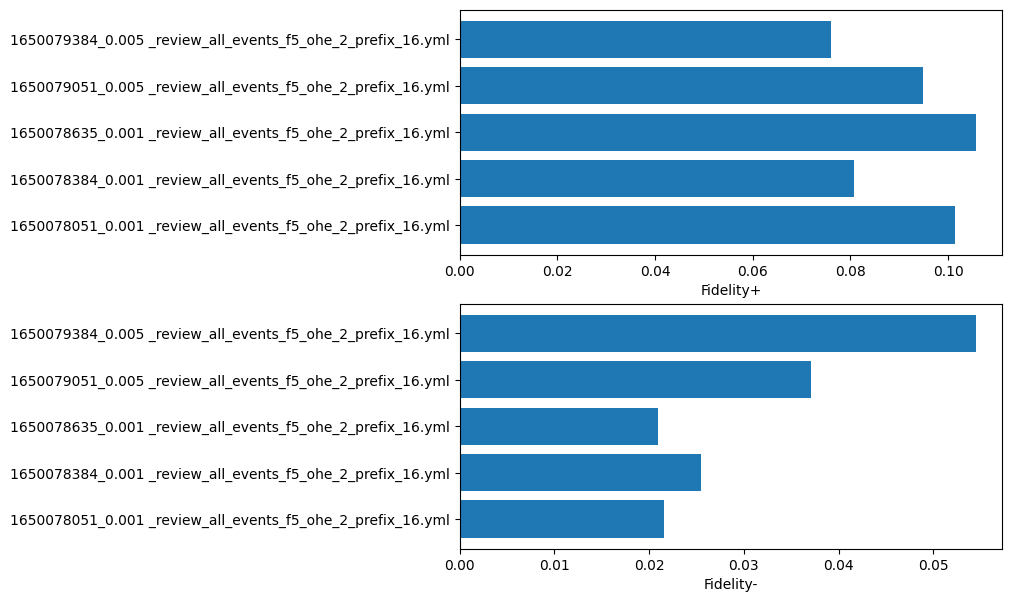

In [ ]:
visual_tuning_results(f"{dataset_name}_{key}", path, True)

####Länge 19

In [ ]:
dataset_name

In [ ]:
# Dataset und Model
key = 19
dataset19 = dataset[key]
input_dim = dataset19[0].x.shape[1]

# split
ds_train, ds_test = split_dataset_2_8(dataset19)

In [ ]:
param = {
    "lr": 0.001,
    "sparsity_ziel": 0.6,
    "epochs": 400
}
model = load_gcn_key(dataset_name, key, input_dim, device, path)
result_col = run_tuning(param, model, ds_test[:100], device, path, f"{dataset_name}_{key}")

In [ ]:
param = {
    "lr": 0.001,
    "sparsity_ziel": 0.6,
    "epochs": 300
}
model = load_gcn_key(dataset_name, key, input_dim, device, path)
result_col = run_tuning(param, model, ds_test[:100], device, path, f"{dataset_name}_{key}")

In [ ]:
param = {
    "lr": 0.001,
    "sparsity_ziel": 0.6,
    "epochs": 500
}
model = load_gcn_key(dataset_name, key, input_dim, device, path)
result_col = run_tuning(param, model, ds_test[:100], device, path, f"{dataset_name}_{key}")

-------------Learning Rate: 0.001--------------
GNNExplainer anwenden


100%|██████████| 100/100 [06:55<00:00,  4.16s/it]

Saved: /content/drive/MyDrive/Rep_Masterarbeit/XAI_GNN_BPM/xai_methods/gnnexplainer/tuning/review_all_events_f5_ohe_2_prefix_19/1650080385_0.001 _review_all_events_f5_ohe_2_prefix_19
Fidelity+: 0.12939926981925964, Fidelity-: -0.01749509759247303, Sparsity: 0.6216215491294861
save Hyperparameter


In [ ]:
param = {
    "lr": 0.005,
    "sparsity_ziel": 0.6,
    "epochs": 400
}
model = load_gcn_key(dataset_name, key, input_dim, device, path)
result_col = run_tuning(param, model, ds_test[:100], device, path, f"{dataset_name}_{key}")

In [ ]:
param = {
    "lr": 0.005,
    "sparsity_ziel": 0.6,
    "epochs": 500
}
model = load_gcn_key(dataset_name, key, input_dim, device, path)
result_col = run_tuning(param, model, ds_test[:100], device, path, f"{dataset_name}_{key}")

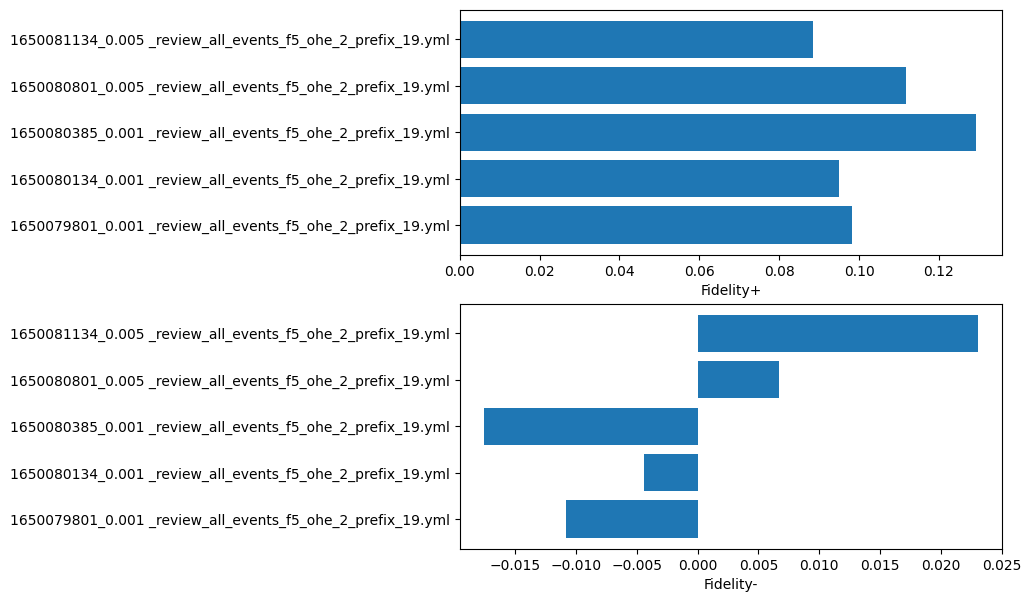

In [ ]:
visual_tuning_results(f"{dataset_name}_{key}", path, True)